**Course Code: CSE 4632**

**Course Name: Digital Signal Processing Lab**

**Lab No: 3**

**Name:** Md Farhan Ishmam

**ID:** 180041120

**Lab Group: P** 

In [ ]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#Task-1

**Explanation:** In the `np.convolve()` function the input signal and the impulse response is passed along with `full` padding. The  `full` argument ensures that the zero padding is performed to ensure that the complete result of convolution is shown as output.

In [ ]:
S = np.array([1,8,0,0,4,1,1,2,0])
H = np.array([2,0,2,1])
output = np.convolve(S,H, 'full')

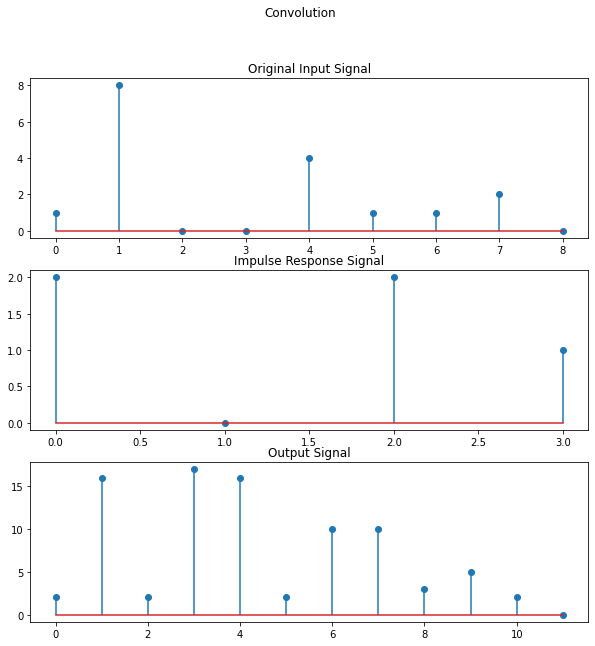

In [ ]:
#Producing the graph
fig = plt.figure(figsize=(10,10))
fig.suptitle('Convolution')
gs  = gridspec.GridSpec(3, 1, height_ratios=[1, 1 ,1])
a1 = plt.subplot(gs[0])
a2 = plt.subplot(gs[1])
a3 = plt.subplot(gs[2])

a1.stem(S,use_line_collection=True)
_ = a1.set_title('\nOriginal Input Signal')

a2.stem(H,use_line_collection=True)
_ = a2.set_title('Impulse Response Signal')

a3.stem(output,use_line_collection=True)
_ = a3.set_title('Output Signal')

#Task-2

**Explanation:** The inputside convolution performs multiplication of each element of the impulse with the whole input signal. The function performs full convolution. Firstly, the output array is initialized with zeros. Then the multiplication is performed and padding is added to shift the signals. Finally, all the produced signals are added and returned as the output signal.

In [ ]:
def InputSideConvolution(orig, impulse):
  # orig = input signal
  # impulse = impulse signal

  #Initializing the output array 
  out_len = len(orig) + len(impulse) - 1
  output = np.zeros((out_len))

  #Performing input side convolution and storing it in output array
  for i in range(len(impulse)):
    prod = orig * impulse[i]
    mul = np.zeros((i))
    extension = [0] * (out_len - len(mul) - len(orig)) #Padding
    prod = np.append(prod, extension)
    mul = np.append(mul, prod)
    output = np.add(output, mul)
  return np.array(output, dtype = int)

#Task-3

**Explanation:** The outputside convolution performs full convolution using the concept of sliding window. First, the padding is added at the beginning of the array. Then the impulse signal is flipped. Then we loop over the elements of the padded input singal and take slices of the input signal equal to the length of the impulse. This is similar to the concept of sliding window. Then elementwise multiplication is done over the slice of input signal and the impulse. Finally, the summation of the produced vector is stored in the output array. So, outputside convolution sums over the elements multiplied in a slice of input signal which is taken by sliding the input the impulse response on the padded input signal.

In [ ]:
def OutputSideConvolution(orig, impulse):
  # orig = input signal
  # impulse = impulse signal

  n = len(impulse)

  #Appending Zeros at the beginning of the array
  appen_orig = np.flip(orig)
  for i in range(n-1):
    appen_orig = np.append(appen_orig,0)
  appen_orig = np.flip(appen_orig)

  #Flipping the impulse signal
  imp_flip = np.flip(impulse)

  output = []

  #Looping over the elements to perform output side convolution
  for i in range(len(appen_orig)):
    slice_orig = appen_orig[i:i+n]
    slice_imp = imp_flip[:len(slice_orig)]
    val = np.sum(np.multiply(slice_orig, slice_imp))
    output.append(val)
  return np.array(output)

#Task-4

Yes, all the functions produce the same results.

In [ ]:
inputSide = InputSideConvolution(S,H)
outputSide = OutputSideConvolution(S,H)
convolveFunc = np.convolve(S,H, 'full')
print("The result of input side algorithm is ", inputSide)
print("The result of output side algorithm is ", outputSide)
print("The result of convolution function is ", convolveFunc)

#Checking equality of the arrays
if np.array_equal(inputSide, outputSide) and np.array_equal(convolveFunc, outputSide):
  print("Yes, the results are the same.")
else:
  print("No, the results are different.")

The result of input side algorithm is  [ 2 16  2 17 16  2 10 10  3  5  2  0]
The result of output side algorithm is  [ 2 16  2 17 16  2 10 10  3  5  2  0]
The result of convolution function is  [ 2 16  2 17 16  2 10 10  3  5  2  0]
Yes, the results are the same.


#Task-5


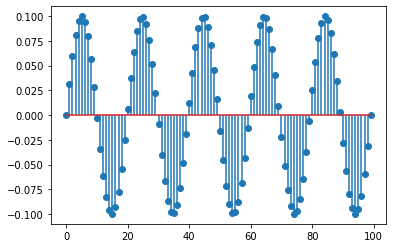

In [ ]:
#Plotting the sine wave
freq = 1
amplitude = 0.1
t = np.linspace(0,5,100)
wave = amplitude*np.sin(2*np.pi*freq*t)
plt.stem(wave, use_line_collection = True)
plt.show()

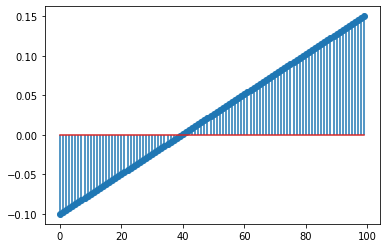

In [ ]:
#Plotting the ramp
ramp = 0.05*t - 0.1
plt.stem(ramp, use_line_collection = True)
plt.show()

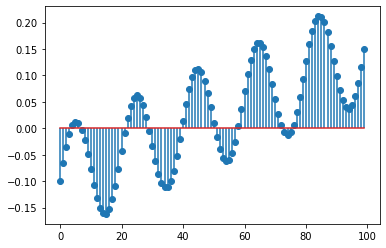

In [ ]:
#Plotting the sine wave plus ramp signal
wave_plus_ramp = wave + ramp
plt.stem(wave_plus_ramp, use_line_collection = True)
plt.show()


**Explanation:** The low pass filter kernel is basically a moving average filter kernel. We first define the kernel as an array of `w` elements where `w` is the kernel size and each element is `1/w`. Then we perform convolution using `np.convolve()` where the padding is selected as `valid`. The `valid` padding ensures that only relevant signals are taken and the unreliable signals at the beginning and end of the array are discarded.

**Output signal should retain the ramp and discard the wave. Can you tell why?**

**Ans:** The output signal will be just the ramp signal. Because the ramp is the lower frequency signal and a low pass signal only lets the lower frequency signal pass. The higher frequency signal or the sine wave has more changes i.e more frequency. When we perform moving average, the changes are cancelled out resulting in a smoother and more consistent signal like the unit ramp. That is why only the lower frequency ramp is retained after passing through a low pass filter.

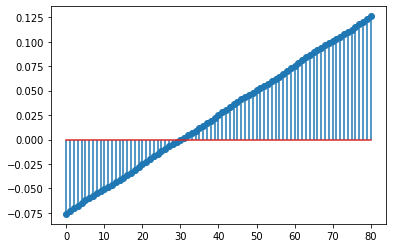

In [ ]:
def low_pass_filtering(x, w):
  # x = input signal
  # w = size of filter kernel
  kernel = np.repeat(1/w , w)
  low_pass_filtered = np.convolve(x, kernel, 'valid')
  return low_pass_filtered

low_pass_filtered = low_pass_filtering(wave_plus_ramp, 20)
plt.stem(low_pass_filtered, use_line_collection = True)
plt.show()

#Task-6

**Explanation:** The high pass filter performs the opposite function, it lets the signal of higher frequency pass while cancelling out the signal with lower frequency. As per instructions, each weight of the filter is `-1/w` where w is the size of the filter. One is added to the element in the middle of the kernel. Then convolution is performed with `valid` padding.

**Output signal will discard the ramp and retain the wave. Can you tell why?**

**Ans:** High pass filter only lets the signal with higher frequency pass while discarding the lower frequency signal. As the ramp is the lower frequency signal, it was discard and the sine wave being the higher frequency signal was retained. The negative weight in the filter retains the higher frequency signal and cancels out the lower frequency signal.

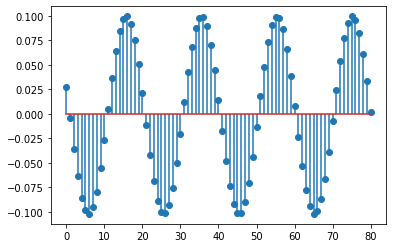

In [ ]:
def high_pass_filtering(x, w):
  # x = input signal
  # w = size of filter kernel
  kernel = np.repeat(-1/w , w)
  idx = int(len(kernel)/2)
  kernel[idx] = kernel[idx] + 1
  high_pass_filtered = np.convolve(x, kernel, 'valid')
  return high_pass_filtered 

high_pass_filtered = high_pass_filtering(wave_plus_ramp, 20)
plt.stem(high_pass_filtered, use_line_collection = True)
plt.show()